<a href="https://colab.research.google.com/github/JALVARADORUIZ/Magister_BigData_UB/blob/main/M2_AI2_AlvaradoRuizJoseArmando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ALUMNO: **JOSE ARMANDO ALVARADO RUIZ**

# **FUNDAMENTOS DE ESTADÍSTICA**

**Entrega: M2_AI2_GESTIÓN DE FACTURAS**







# **Descripción de la tarea**
El objetivo de esta actividad consiste en identificar y analizar el total pagado de un dataset de facturas que tiene una compañía.

El diccionario de datos es el siguiente:

 
* Id: identificador correlativo y secuencial del número de registros de facturas.
* Fecha: fecha en la que se generó la factura.
* Mes: mes en la que se generó la factura.  
* Cliente: tipo de cliente, clasificado de la A a la D.
* Factura pagada: descriptivo de si está pagada o no, en la fecha de generación.
* Importe factura: importe neto sin el IVA.
* Tipo IVA: es el tipo de impuesto aplicado (descriptivo).
* Porcentaje IVA: es el porcentaje aplicado.
* IVA: es el valor numérico del porcentaje correspondiente a la factura.
* Total pagado: es el importe bruto de la factura (el neto más el importe IVA).


### **Importación librerias**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

# Carga de Datos y visualización general

In [3]:
url = 'https://raw.githubusercontent.com/md-lorente/data/master/datos_facturas.csv'
df = pd.read_csv(url, sep=';', decimal=',')

Visualización de los primeros 10 registros del dataset.


In [4]:
df.head(10)

,id,fecha,mes,cliente,factura_pagada,importe_factura,tipo_IVA,porcentaje_IVA,IVA,total_pagado
0,1,01/01/2010,Enero,clienteA,si,100,normal,18,18.0,118.0
1,2,02/01/2010,Enero,clienteB,no,150,normal,18,27.0,177.0
2,3,03/01/2010,Enero,clienteC,si,75,normal,18,13.5,88.5
3,4,04/01/2010,Enero,clienteD,si,200,normal,18,36.0,236.0
4,5,05/01/2010,Enero,clienteA,no,125,normal,18,22.5,147.5
5,6,06/01/2010,Enero,clienteB,si,100,reducido,8,8.0,108.0
6,7,07/01/2010,Enero,clienteC,si,175,reducido,8,14.0,189.0
7,8,08/01/2010,Enero,clienteD,no,200,normal,18,36.0,236.0
8,9,09/01/2010,Enero,clienteA,si,100,normal,18,18.0,118.0
9,10,10/01/2010,Enero,clienteB,si,100,normal,18,18.0,118.0


In [45]:
# estructura de nuestro dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               45 non-null     int64  
 1   fecha            45 non-null     object 
 2   mes              45 non-null     object 
 3   cliente          45 non-null     object 
 4   factura_pagada   45 non-null     object 
 5   importe_factura  45 non-null     int64  
 6   tipo_IVA         45 non-null     object 
 7   porcentaje_IVA   45 non-null     int64  
 8   IVA              45 non-null     float64
 9   total_pagado     45 non-null     float64
dtypes: float64(2), int64(3), object(5)
memory usage: 3.6+ KB


In [6]:
# Analisis global de datos estadisticos de la muestra de variables cuantitativas
df.describe()

,id,importe_factura,porcentaje_IVA,IVA,total_pagado
count,45.000000,45.000000,45.000000,45.000000,45.000000
mean,23.000000,126.777778,16.000000,20.531111,147.308889
std,13.133926,49.026379,4.045199,10.026461,57.936116
min,1.000000,25.000000,8.000000,2.400000,29.500000
25%,12.000000,100.000000,18.000000,13.500000,108.000000
50%,23.000000,125.000000,18.000000,18.000000,135.000000
75%,34.000000,175.000000,18.000000,27.000000,189.000000
max,45.000000,200.000000,18.000000,36.000000,236.000000


El dataset consta de **45 registros** con **10 variables**.


**Análisis de variables:**

- Id: identificador correlativo y secuencial del número de registros de facturas. Variable del tipo Cuantitativa Continua.

- Fecha: fecha en la que se generó la factura. Variable del tipo Cualitativa ordinal y en función del análisis de datos como Categórica.

- Mes: mes en la que se generó la factura. Variable del tipo Cualitativa ordinal y en función del análisis de datos como Categórica.

- Cliente: tipo de cliente, clasificado de la A a la D. Variable del tipo Cualitativa nominal y en función del análisis de datos como Categórica.

- Factura pagada: descriptivo de si está pagada o no, en la fecha de generación. Variable del tipo Cualitativa binaria (dos valores: si y no) y en función del análisis de datos como Categórica.

- Importe factura: importe neto sin el IVA. Variable del tipo Cuantitativa continua y en función del análisis de datos como Análitica.

- Tipo IVA: es el tipo de impuesto aplicado (descriptivo). Variable del tipo Cualitativa binaria (existen dos valores asociados a tipo IVA: reducido y normal) y en función del análisis de datos como Categórica.

- Porcentaje IVA: es el porcentaje aplicado. Variable del tipo Cuantitativa discreta y en función del análisis de datos como Categórica, ya que estos son valores definidos y que podemos clasificar.

- IVA: es el valor numérico del porcentaje correspondiente a la factura. Variable del tipo Cuantitativa continua y en función del análisis de datos como Análitica.

- Total pagado: es el importe bruto de la factura (el neto más el importe IVA). Variable del tipo Cuantitativa continua y en función del análisis de datos como Análitica.

# **Analisis Variable total_pagado**

Esta variable representa el total facturado de la compra, y no necesariamente al total pagado, ya que existe la variable factura_pagada (cualitativa binaria) en la cual se define si esta pagada o no la factura.

Aclarado esto, la variable total_pagado es del tipo **cuantitativa continua**, y desde el punto de vista de analisis de datos se debe considerar como **Analítica**.

Su tabla de frecuencia es:

In [7]:
frequency_total_pagado = df.groupby("total_pagado").agg(frecuencia_absoluta=("total_pagado", "count"))
frequency_total_pagado["frecuencia_absoluta_acumulada"] = frequency_total_pagado["frecuencia_absoluta"].cumsum()
frequency_total_pagado["frecuencia_relativa"] = frequency_total_pagado["frecuencia_absoluta"] / len(df)
frequency_total_pagado["frecuencia_relativa_acumulada"] = frequency_total_pagado["frecuencia_relativa"].cumsum()

frequency_total_pagado



,frecuencia_absoluta,frecuencia_absoluta_acumulada,frecuencia_relativa,frecuencia_relativa_acumulada
total_pagado,,,,
29.5,1,1,0.022222,0.022222
32.4,1,2,0.022222,0.044444
59.0,1,3,0.022222,0.066667
88.5,6,9,0.133333,0.200000
108.0,4,13,0.088889,0.288889
118.0,8,21,0.177778,0.466667
135.0,2,23,0.044444,0.511111
147.5,4,27,0.088889,0.600000
177.0,6,33,0.133333,0.733333


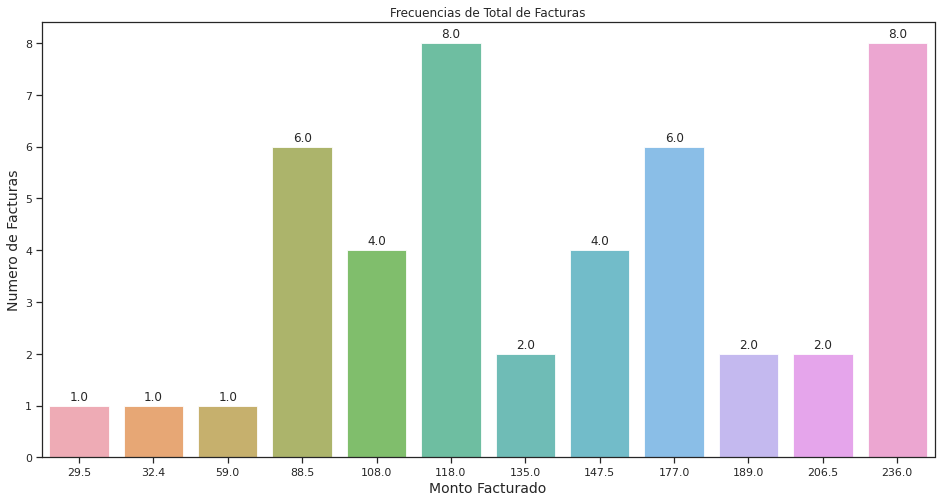

In [8]:
plt.figure(figsize=[16, 8])
sns.set(style="ticks")

bplot = sns.barplot(x=frequency_total_pagado.index, y=frequency_total_pagado.frecuencia_absoluta, alpha=0.8);

for p in bplot.patches:
    bplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Frecuencias de Total de Facturas');
plt.ylabel('Numero de Facturas', fontsize=14);
plt.xlabel('Monto Facturado', fontsize=14);

**Medidas de Centralización:**

Ahora analizaremos las siguientes medidas de centralización: 
- Media aritmetica
- Mediana
- Moda

In [9]:
# Copiamos df con la variable total_pagado
total_pagado = df['total_pagado'].copy(deep='True')
df_total_pagado = pd.DataFrame(total_pagado)

In [10]:
# Calculamos la media aritmetica, utilizando la funcion mean()
mean = df_total_pagado.mean()
print(f'La media aritmetica de la variable total_pagado es: {mean[0]}')

La media aritmetica de la variable total_pagado es: 147.30888888888887


In [11]:
# Calculamos la mediana, utilizando la funcion median()
median = df_total_pagado.median()
print(f'La mediana de la variable total_pagado es: {median[0]}')


La mediana de la variable total_pagado es: 135.0


In [12]:
# Calculamos la moda, utilizando la funcion mode()
mode = df_total_pagado.mode()
print(f'La moda de la variable: {mode}')

La moda de la variable:    total_pagado
0         118.0
1         236.0


En el caso de la moda de la variable total_pagado, me entrega dos valores, por lo que se considera como una **bimodal**, lo cual se puede comprobar en la tabla de frecuencia, el cual nos indica que estos dos valores se repiten en 8 ocasiones en nuestro dataset.

Otra conclusión que podemos obtener de las medidas de centralización, es que **no se cumple la condición de simetria**, ya que la media es distinta a la media y a la moda.


**Medidas de dispersión:**

Se analizarán las siguientes medidas: 
- rango
- varianza
- desviación típica 
- coeficiente de variación.

In [13]:
# Calcularemos el Rango de la variable total_pagado

rango = max(df_total_pagado.total_pagado) - min(df_total_pagado.total_pagado)
print(f"El Rango de la variable total_pagado es: {rango}")

El Rango de la variable total_pagado es: 206.5


In [14]:
# Calcularemos la varianza de la variable total_pagado
var = round(df_total_pagado["total_pagado"].var(),3)
print(f"La varianza de la variable total_pagado es: {var}")

La varianza de la variable total_pagado es: 3356.594


In [15]:
# Calcularemos la desviación típica de la variable total_pagado
std = round(df_total_pagado["total_pagado"].std(ddof=1),3)
print(f"La varianza de la variable total_pagado es: {std}")

La varianza de la variable total_pagado es: 57.936


In [16]:
# Calcularemos el coeficiente de variación de la variable total_pagado
cv = round(std / mean[0] * 100, 3)

print(f"El coeficiente de variación de la variable total_pagado es: {cv}%")

El coeficiente de variación de la variable total_pagado es: 39.33%


 **Medidas de posición**

Se calcularan las siguientes medidas de posición para la variable total_pagado:

- rango intercuartílico
- cuartil primero
- decil 3. 
- ¿Cuál es la factura que tiene como mínimo el 10% del total pagado de las facturas?

In [17]:
# calculamos el rango intercuartílico para la variable total_pagado
iqr = df_total_pagado["total_pagado"].quantile(0.75) - df_total_pagado["total_pagado"].quantile(0.25)
print(f"El rango intercuartílico para la variable total_pagado es: {iqr}")

El rango intercuartílico para la variable total_pagado es: 81.0


In [18]:
# calculamos el primer cuartil para la variable total_pagado
q1 = df_total_pagado["total_pagado"].quantile(0.25)
print(f"El primer cuartil para la variable total_pagado es: {q1}")

El primer cuartil para la variable total_pagado es: 108.0


In [19]:
# calculamos el tercer decil para la variable total_pagado
d3 = df_total_pagado["total_pagado"].quantile(0.3)
print(f"El tercer decil para la variable total_pagado es: {d3}")

El tercer decil para la variable total_pagado es: 118.0


In [20]:
# ¿Cuál es la factura que tiene como mínimo el 10% del total pagado de las facturas?

p90 = df_total_pagado["total_pagado"].quantile(0.9)
print(f"El valor mínimo es: {p90}")

El valor mínimo es: 236.0


Podemos ver que las siguientes 8 facturas tienen como mínimo el 10% del total pagado, ahora bien el 75% de ellas estan pagadas (6 de 8).

In [21]:
facturas_minimo_10 = df.loc[df['total_pagado'] >= p90]
facturas_minimo_10

,id,fecha,mes,cliente,factura_pagada,importe_factura,tipo_IVA,porcentaje_IVA,IVA,total_pagado
3,4,04/01/2010,Enero,clienteD,si,200,normal,18,36.0,236.0
7,8,08/01/2010,Enero,clienteD,no,200,normal,18,36.0,236.0
12,13,13/01/2010,Enero,clienteA,si,200,normal,18,36.0,236.0
19,20,20/01/2010,Enero,clienteD,si,200,normal,18,36.0,236.0
24,25,25/01/2010,Enero,clienteD,si,200,normal,18,36.0,236.0
28,29,29/01/2010,Enero,clienteD,no,200,normal,18,36.0,236.0
33,34,03/02/2010,Febrero,clienteA,si,200,normal,18,36.0,236.0
40,41,10/02/2010,Febrero,clienteD,si,200,normal,18,36.0,236.0


**Medidas de concentración y forma:**

Determinaremos la curtosis, asimetría y un gráfico de la variable total_pagado.

In [22]:
# Calcularemos la Curtosis mediante la funcion kurtosis()

curtosis = df_total_pagado['total_pagado'].kurtosis(skipna = True)
print(f"La curtosis de la variable total_pagado es: {curtosis}")

La curtosis de la variable total_pagado es: -0.7990963830478419


In [23]:
# Calcularemos la asimetria mediante la funcion skew()
asimetria = df_total_pagado['total_pagado'].skew()
print(f"El coeficiente de asimetria de Fisher de la variable total_pagado es: {asimetria}")

El coeficiente de asimetria de Fisher de la variable total_pagado es: 0.09644182245694456


Con ambas medidas se puede determinar que la distribución de la variable total_pagado es **Asimetrica positiva** (coeficiente positivo o  𝐶𝐴𝐹>0 ),  lo cual indica que la cola derecha es más larga que la izquierda. Dicho de otro modo, en la cola derecha encontramos valores más alejados de la media que en la cola izquierda.

Con respecto a la curtosis es del tipo **Platicúrtica** (menos concentración en los valores centrales de la variable o  𝐶𝑢𝑟𝑡𝑜𝑠𝑖𝑠<0).

Tras analizar ambos coeficientes vemos que la serie no se ajusta totalmente a la normalidad.

Veamos el histograma de la variable total_pagado:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


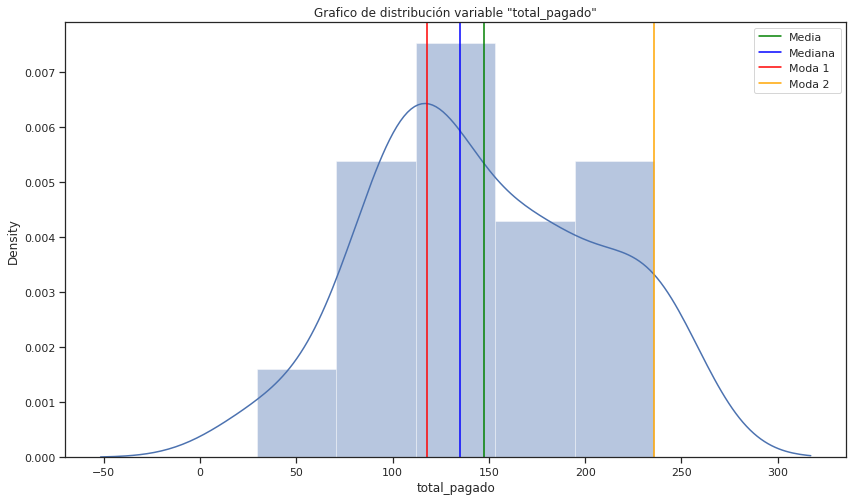

In [48]:
fig, ax = plt.subplots(figsize=(14,8))

sns.distplot(df_total_pagado['total_pagado']);


plt.title('Grafico de distribución variable "total_pagado"')
plt.axvline(df_total_pagado['total_pagado'].mean(), color='green', label='Media')
plt.axvline(df_total_pagado['total_pagado'].median(), color='blue', label='Mediana')
plt.axvline(df_total_pagado['total_pagado'].mode()[0], color='red', label='Moda 1')
plt.axvline(df_total_pagado['total_pagado'].mode()[1], color='orange', label='Moda 2')
plt.legend();


En el gráfico de la distribución se han incorporado los valores de las medidas de centralización. 

Ahora analizaremos el grafico de distribución de la variable "total_pagado" pero donde la factura se encuentra pagada (variable "factura_pagada" con valor si).

En primer lugar, las medidas de centralización son:

In [57]:
median_pagado = df[df['factura_pagada']=='si']['total_pagado'].median()
mean_pagado = df[df['factura_pagada']=='si']['total_pagado'].mean()
mode_pagado = df[df['factura_pagada']=='si']['total_pagado'].mode()[0]

print(f"Medidas de Centralizacion para variable total_pagado para factura_pagada = si\n media:{mean_pagado}\n mediana:{median_pagado} \n moda:{mode_pagado}")

Medidas de Centralizacion para variable total_pagado para factura_pagada = si
 media:147.6290322580645
 mediana:118.0 
 moda:118.0


In [59]:
curtosis_pagado = df[df['factura_pagada']=='si']['total_pagado'].kurtosis(skipna = True)
print(f"La curtosis de la variable total_pagado es: {curtosis_pagado}")

asimetria_pagado = df[df['factura_pagada']=='si']['total_pagado'].skew()
print(f"El coeficiente de asimetria de Fisher de la variable total_pagado es: {asimetria_pagado}")

La curtosis de la variable total_pagado es: -1.0343514849162272
El coeficiente de asimetria de Fisher de la variable total_pagado es: 0.2651829129164529


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


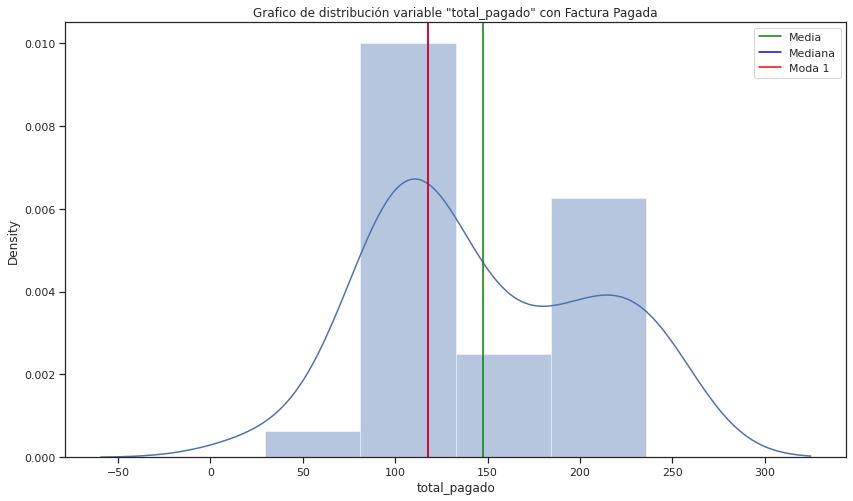

In [52]:
fig, ax = plt.subplots(figsize=(14,8))
sns.distplot(df[df['factura_pagada']=='si']['total_pagado']);


plt.title('Grafico de distribución variable "total_pagado" con Factura Pagada')
plt.axvline(df[df['factura_pagada']=='si']['total_pagado'].mean(), color='green', label='Media')
plt.axvline(df[df['factura_pagada']=='si']['total_pagado'].median(), color='blue', label='Mediana')
plt.axvline(df[df['factura_pagada']=='si']['total_pagado'].mode()[0], color='red', label='Moda')
plt.legend();

El gráfico de distribución nos muestra asimetría positiva y la curtosis es del tipo Platicúrtica al igual que el anterior gráfico.

**Análisis rápido con box-plot y sus medidas.**

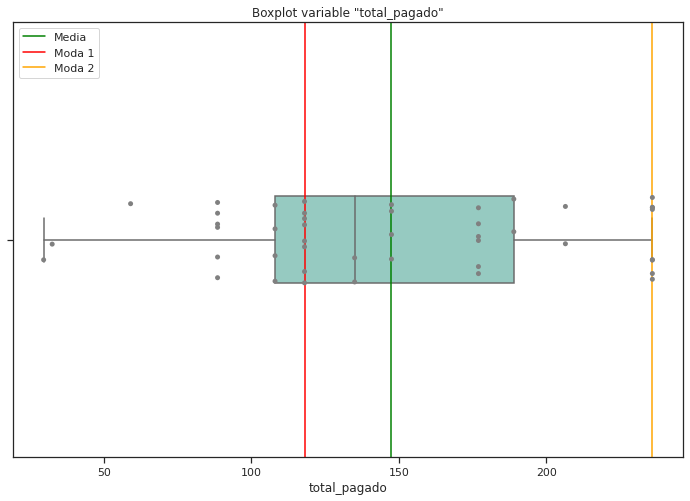

In [46]:
sns.set_theme(style="ticks")
ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x=df_total_pagado["total_pagado"], palette="Set3", width=.2, whis=[0, 100])
sns.stripplot(x="total_pagado", data=df_total_pagado, size=5, color=".5", linewidth=0)

plt.title('Boxplot variable "total_pagado"')
plt.axvline(df_total_pagado['total_pagado'].mean(), color='green', label='Media')
plt.axvline(df_total_pagado['total_pagado'].mode()[0], color='red', label='Moda 1')
plt.axvline(df_total_pagado['total_pagado'].mode()[1], color='orange', label='Moda 2')


plt.legend();

En la gráfica del Boxplot se ha incorporado las lineas en colores que representan las medidas de centralización como media y modas. Asi podemos concluir que:

- Existe una Asimetría hacia la derecha. Esto reflejado ya que la mediana se encuentra más cercana al extremo superior del primer cuartil.

- Existen dos modas (bimodal) y una de ellas se encuentra en el valor máximo antes de la valla superior (linea amarilla), lo cual distorsiona al valor de la media aritmetica.

- No se visualizan datos atípicos ni en el extremo inferior ni superior.

- Existen valores que coinciden con la mediana y con la media aritmetica (linea color verde).

**Analiza los resultados e informa de quién es el cliente que ha pagado más en todas las facturas.**

In [26]:
total_factura_clientes = df.groupby('cliente').agg({"total_pagado":sum})

In [27]:
total_factura_clientes


,total_pagado
cliente,
clienteA,2099.0
clienteB,1337.0
clienteC,1154.5
clienteD,2038.4


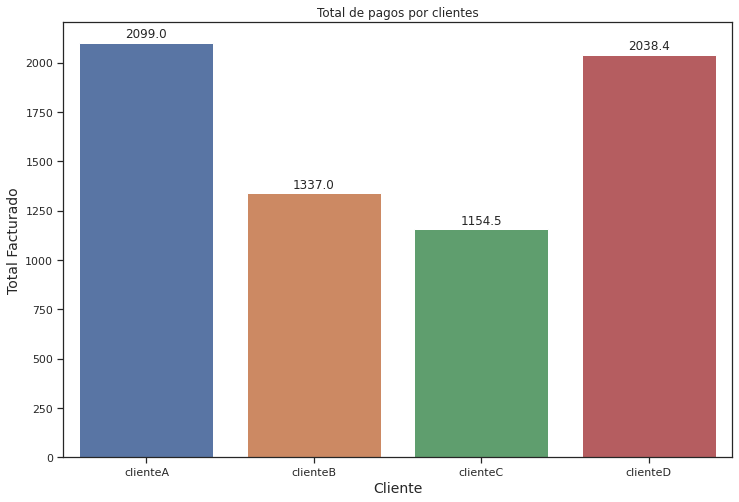

In [28]:
plt.figure(figsize=(12, 8))
bplot = sns.barplot(x=total_factura_clientes.index,y=total_factura_clientes.total_pagado)
for p in bplot.patches:
    bplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Total de pagos por clientes');
plt.ylabel('Total Facturado', fontsize=14);
plt.xlabel('Cliente', fontsize=14);



Como se aprecia en la tabla y luego se aprecia en el gráfico de barra, el cliente que más ha pagado es **clienteA** con un total facturado de **2099.0**. Ahora si solo consideramos a los clientes que han efectuado el pago de la factura vemos que:



In [29]:
total_factura_clientes_si = df[df.factura_pagada == 'si'].groupby('cliente').agg({"total_pagado":sum})
total_factura_clientes_si

,total_pagado
cliente,
clienteA,1534.0
clienteB,924.0
clienteC,584.5
clienteD,1534.0


En este caso, el **clienteA y el clienteD** son los clientes que más han pagado en facturas con un total de **1534.0**.



---





**¿Quién es el cliente que más facturas no ha pagado en el mes de febrero?**

In [30]:
total_facturas_febrero = df[(df['mes'] == 'Febrero') & (df['factura_pagada']=='no')].groupby(['cliente'])['total_pagado'].agg(['count', 'sum'])

In [31]:
total_facturas_febrero

,count,sum
cliente,,
clienteA,1,135.0
clienteB,1,59.0
clienteC,2,285.0
clienteD,1,32.4


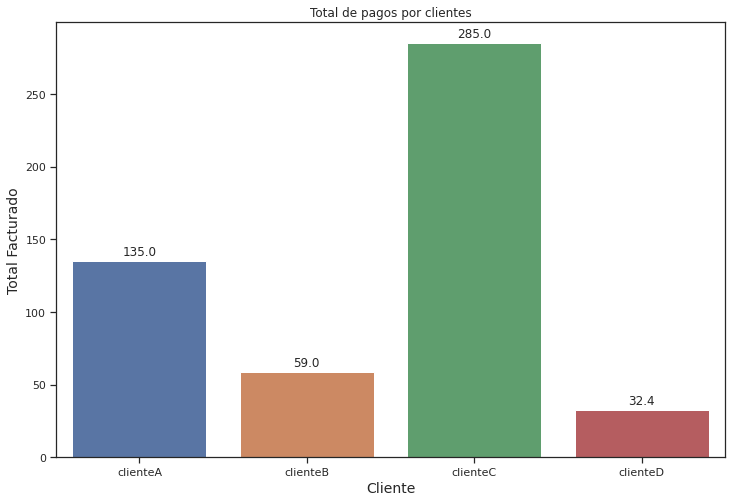

In [32]:
plt.figure(figsize=(12, 8))
bplot = sns.barplot(x=df.cliente.unique(),y='sum', data=total_facturas_febrero)
for p in bplot.patches:
    bplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Total de pagos por clientes');
plt.ylabel('Total Facturado', fontsize=14);
plt.xlabel('Cliente', fontsize=14);

Analizando los datos, se puede obtener que el clienteC es el que tiene más facturas no pagadas en el mes de febrero con **2 facturas por un total de 285.0**. Los demás clientes solo tienen una factura no pagada.

A continuación se muestran las dos facturas que no han sido pagadas por el clienteC en el mes de febrero:

In [33]:
facturas_cliente_c = df[(((df['cliente']== 'clienteC') & (df['mes'] == 'Febrero')) & (df['factura_pagada']=='no'))]

In [34]:
facturas_cliente_c

,id,fecha,mes,cliente,factura_pagada,importe_factura,tipo_IVA,porcentaje_IVA,IVA,total_pagado
31,32,01/02/2010,Febrero,clienteC,no,150,normal,18,27.0,177.0
35,36,05/02/2010,Febrero,clienteC,no,100,reducido,8,8.0,108.0




---




## **Crea un gráfico que represente el total pagado de las facturas respecto del IVA aplicado.**

Analisis variable IVA:

En primer lugar, creamos una tabla con todos los valores asociados a facturas y el IVA aplicado y la frecuencia de estos.

In [35]:
frequency_valores = df.groupby(["total_pagado","IVA","tipo_IVA"]).agg(frequencia=("total_pagado", "count")).reset_index()
frequency_valores

,total_pagado,IVA,tipo_IVA,frequencia
0,29.5,4.5,normal,1
1,32.4,2.4,reducido,1
2,59.0,9.0,normal,1
3,88.5,13.5,normal,6
4,108.0,8.0,reducido,4
5,118.0,18.0,normal,8
6,135.0,10.0,reducido,2
7,147.5,22.5,normal,4
8,177.0,27.0,normal,6
9,189.0,14.0,reducido,2


<Figure size 1152x576 with 0 Axes>

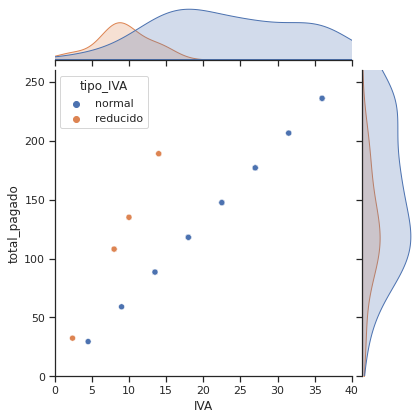

In [36]:
plt.figure(figsize=(16, 8))
jplot = sns.jointplot(data=df, x="IVA", y="total_pagado", hue="tipo_IVA", palette="deep",
              xlim=(0, 40), ylim=(0, 260))



Utilizamos un joinplot (gráfico de dispersión) para graficar la representación de total_pagado con respecto al IVA aplicado, además de representar la categoria tipo de IVA con colores. 

En nuestro dataset se observa que el crecimiento de una de las variables (IVA) implica el crecimiento de la otra (total_pagado), lo que se conoce como **correlación positiva**. Es interesante visualizar que el crecimiento de total_pagado es menor cuando el IVA es del tipo reducido, mientras que cuando el IVA es del tipo normal el total_pagado sube en forma mayor, todo esto se explica ya que los valores de IVA son diferente y tienen valores menores en el caso de reducido.

# Covarianza de ambas variables

Determinaremos la covarianza de las variables IVA y total_pagado.

In [37]:
cov_iva = round(df[['total_pagado','IVA']].cov(ddof=0),3)
cov_iva['total_pagado']['IVA']

515.063

La Covarianza (total_pagado,IVA)  es mayor que cero, ya que cuando “total_pagado” sube, tambien “IVA” sube, por lo que hay una relación positiva. Para saber la relación ajustada entre las dos variables deberíamos calcular la correlación lineal.


In [42]:
# Cálculo de correlación con Pandas
# ==============================================================================
print('Correlación Pearson: ', round(df['total_pagado'].corr(df['IVA'], method='pearson'),4))


Correlación Pearson:  0.9068


In [39]:
# Matriz de correlación
# ==============================================================================
corr_matrix = df[['total_pagado','IVA']].corr(method='pearson')
corr_matrix

,total_pagado,IVA
total_pagado,1.000000,0.906824
IVA,0.906824,1.000000


Como se puede apreciar mediante la correlación de Pearson y que se refleja en la Matriz de correlación de ambas variables podemos concluir que existe una **correlación positiva** y podemos indicar que al cuantificar la asociación lineal entre estas dos variables numéricas es muy alta (Correlación superior a 0.9).